<a href="https://colab.research.google.com/github/Ianfm94/Financial_Analysis/blob/master/LSTM_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

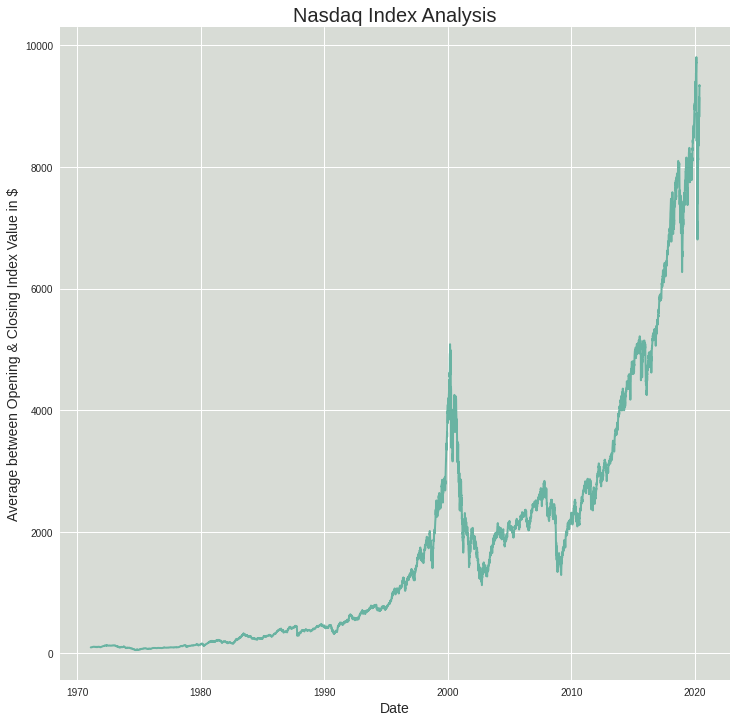

In [61]:
# First Method, (Seaborn)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates as mpl_dates

# Reading in data
nasdaq_data = "https://raw.githubusercontent.com/Ianfm94/Financial_Analysis/master/NASDAQ_data%20US%20Listing.csv"

X = pd.read_csv(nasdaq_data)
Y = X['close']
#print(X.head(n=3))

### Very important step
X['date'] = pd.to_datetime(X['date'])
X.sort_values('date', inplace=True)

# Create figure and plot space
#fig, ax = plt.subplots(figsize=(12, 12))

# Use seaborn style
#plt.style.use('seaborn')

# Add x-axis and y-axis, colour of graph and increase 
# the line-width
#ax.plot_date(X['date'],
       #X['mid_price'],
       #color='#69b3a2', linestyle='dashdot')

# Set title and labels for axes
#ax.set(xlabel='Date',
       #ylabel='Average between Opening & Closing Index Value in $',
       #title='Nasdaq Index Analysis')

# Add grid and tight layout
#plt.grid(b=True, which='both', axis='both')
#plt.tight_layout()

# More date workings, change to Year format
#plt.gcf().autofmt_xdate()
#date_format = mpl_dates.DateFormatter('%Y')
#plt.gca().xaxis.set_major_formatter(date_format)

#plt.show()

## Method_2 Looks Nicer

import matplotlib.dates as mdates

# Create figure and plot space
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

# Add x-axis and y-axis, colour of graph and increase 
# the line-width
ax.plot(X['date'],
       X['mid_price'],
       color='#69b3a2', lw=2)

# Set title and labels for axes
plt.title('Nasdaq Index Analysis', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average between Opening & Closing Index Value in $',
           fontsize=14)

# Change plot background colour
ax.set_facecolor('xkcd:light grey')

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Add grid
plt.grid(b=True, which='both', axis='both')

plt.show()

In [49]:
Y = np.array(Y)
X = np.array(X)

np.random.seed(111)

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.25, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of test samples: ", X_test.shape)
print("Labels for training and testing data")

Total number of training samples:  (9324, 8)
Total number of test samples:  (3109, 8)
Labels for training and testing data


In [0]:
# LSTM Workings

import os
from pathlib import Path
import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split

